# Support Vector Machine Classifiers 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC

# open file and store data into "dataset" variable
file = 'datasets/dataset.csv'
dataset = pd.read_csv(file, header = None)

## Functions definitions

In [2]:
# Function used for scaling of the dataset
def feature_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

# Function used to calculate the loss
def calculate_loss(pred_output, true_output):
  sq_error = (true_output - pred_output) ** 2
  sum_sq_error = np.sum(sq_error)
  loss = sum_sq_error / len(true_output)
  return loss

## Splitting the dataset

In [3]:
# dividing input (X) and output (y) data
X = dataset.iloc[: , :-1]
y = dataset.iloc[:, [2]]

# splitting the dataset into train and test data with 50-50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_train, X_test = feature_scaling(X_train, X_test)


## Linear SVM Classifier

In [4]:
def SVM_classifier(X_train, y_train, X_test, y_test):
  # Setting the svm classifier using a linear kernel
  svm = SVC(C=1, kernel = 'linear', random_state=0)
  svm.fit(X_train, y_train)

  # Making the predictions for the train and the test set respectively
  y_pred_test = svm.predict(X_test)
  y_pred_train = svm.predict(X_train)

  # Calculating the accuracy of the train and the test set
  accuracy_test = accuracy_score(y_test, y_pred_test)
  accuracy_train = accuracy_score(y_train, y_pred_train)

  mean_classification_error = mean_absolute_error(y_test, y_pred_test)

  # Classification report
  print('Classification Report\n\n')
  print(classification_report(y_test, y_pred_test))

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred_test)
  print('Confusion matrix\n\n', cm)
  print('\n\n')

  return svm, accuracy_train, mean_classification_error,y_pred_test, y_pred_train


In [5]:
#Calculating the mean classification error for linear SVM
svm = SVM_classifier(X_train, y_train.values.ravel(), X_test, y_test)
print(f"The mean classification error for the linear SVM is {svm[2]}\n\n\n\n")

Classification Report


              precision    recall  f1-score   support

           1       0.69      0.82      0.75        56
           2       0.78      0.63      0.70        46
           3       0.94      0.89      0.92        38

    accuracy                           0.78       140
   macro avg       0.80      0.78      0.79       140
weighted avg       0.79      0.78      0.78       140

Confusion matrix

 [[46  8  2]
 [17 29  0]
 [ 4  0 34]]



The mean classification error for the linear SVM is 0.2642857142857143






## RBF Kernel SVM Classifier 

In [6]:
def SVM__RBF_classifier(g, X_train, y_train, X_test, y_test):

  # Setting the svm classifier using an rbf kernel
  svm = SVC(kernel = 'rbf', gamma=g)
  svm.fit(X_train, y_train)

  # Making the predictions
  y_pred = svm.predict(X_test)
  y_pred_train = svm.predict(X_train)

  # Claculating the accuracy
  accuracy = accuracy_score(y_test, y_pred)

  mean_classification_error = mean_absolute_error(y_test, y_pred)

  # Classification report
  print('Classification Report\n\n')
  print(classification_report(y_test, y_pred))
  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion matrix\n\n', cm)
  print('\n\n')

  return svm, accuracy, mean_classification_error, y_pred, y_pred_train

In [7]:
gamma = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 2.5, 3, 10, 20, 50, 100, 200, 500]
rbfs = []
for i in gamma:
  svm_rbf = SVM__RBF_classifier(i, X_train, y_train.values.ravel(), X_test, y_test)
  print(f"The mean classification for {i} error is {svm_rbf[2]}\n\n\n")
  rbfs.append(svm_rbf[2])

min_mean_classification_error = min(rbfs)
position = rbfs.index(min_mean_classification_error)
right_gamma = gamma[position]
print(f"\nThe wanted gamma is {right_gamma} where the mean classification error is {min_mean_classification_error}\n")


Classification Report


              precision    recall  f1-score   support

           1       0.40      1.00      0.57        56
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        38

    accuracy                           0.40       140
   macro avg       0.13      0.33      0.19       140
weighted avg       0.16      0.40      0.23       140

Confusion matrix

 [[56  0  0]
 [46  0  0]
 [38  0  0]]



The mean classification for 0.001 error is 0.8714285714285714



Classification Report


              precision    recall  f1-score   support

           1       0.40      1.00      0.57        56
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        38

    accuracy                           0.40       140
   macro avg       0.13      0.33      0.19       140
weighted avg       0.16      0.40      0.23       140

Confusion matrix

 [[56  0  0]
 [46  0  0]
 [38  0  0]]



The mea

c:\Users\nbosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nbosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nbosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Confusion matrix

 [[51  3  2]
 [ 7 39  0]
 [ 4  0 34]]



The mean classification for 0.3 error is 0.15714285714285714



Classification Report


              precision    recall  f1-score   support

           1       0.83      0.89      0.86        56
           2       0.93      0.87      0.90        46
           3       0.92      0.89      0.91        38

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140

Confusion matrix

 [[50  3  3]
 [ 6 40  0]
 [ 4  0 34]]



The mean classification for 0.4 error is 0.16428571428571428



Classification Report


              precision    recall  f1-score   support

           1       0.79      0.93      0.85        56
           2       0.92      0.78      0.85        46
           3       0.97      0.89      0.93        38

    accuracy                           0.87       140
   macro avg       0.89      0.87      0.88       140

## Plotting Correclty classified samlpes, missclassified samples and decision boundaries for both SVMs

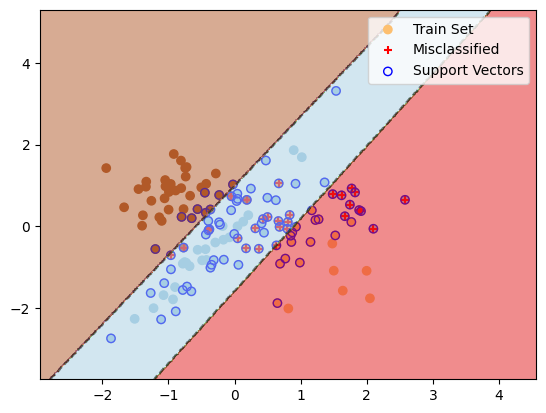

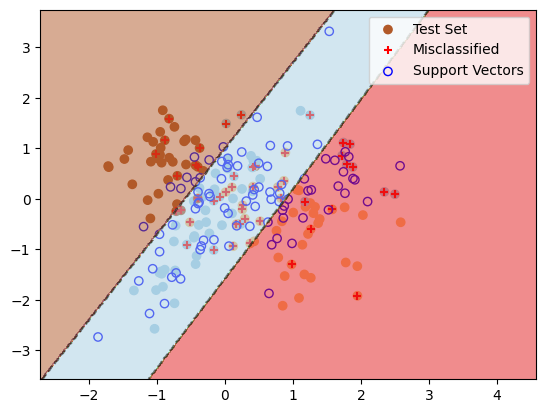

In [8]:
# Create a support vector classifier
clf = svm[0]

# Predict on the test set
y_pred = svm[3]
y_pred_train = svm[4]
misclassified_indices = []

# Plotting function
def plot_svm(classifier, X, y, y_pred, is_train):

  #Checking if it is plotting for the train or the test set
  if is_train:
      plt.scatter(X[:, 0], X[:, 1], c=y.values.ravel(), cmap=plt.cm.Paired, label='Train Set')
  else:
    plt.scatter(X[:, 0], X[:, 1], c=y.values.ravel(), cmap=plt.cm.Paired, label='Test Set')

  # Finding the misclassified samples
  for i in range(len(y)):
      if y.values.ravel()[i] != y_pred[i]:
          misclassified_indices.append(i)

  if len(misclassified_indices) > 0:
      plt.scatter(X[misclassified_indices, 0], X[misclassified_indices, 1], marker='+', facecolors='r', label='Misclassified')

  # Plot support vectors
  sv = classifier.support_vectors_
  plt.scatter(sv[:, 0], sv[:, 1], marker='o', facecolors='none', edgecolors='blue', label='Support Vectors')

  # Plot decision boundary with filled contours
  h = 0.02  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 2
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

  plt.legend()
  plt.show()

# Plot the SVM classifier
plot_svm(clf, X_train, y_train, y_pred_train, True)
plot_svm(clf, X_test, y_test, y_pred, False)

Classification Report


              precision    recall  f1-score   support

           1       0.80      0.95      0.87        56
           2       0.95      0.76      0.84        46
           3       0.97      0.95      0.96        38

    accuracy                           0.89       140
   macro avg       0.91      0.88      0.89       140
weighted avg       0.90      0.89      0.89       140

Confusion matrix

 [[53  2  1]
 [11 35  0]
 [ 2  0 36]]





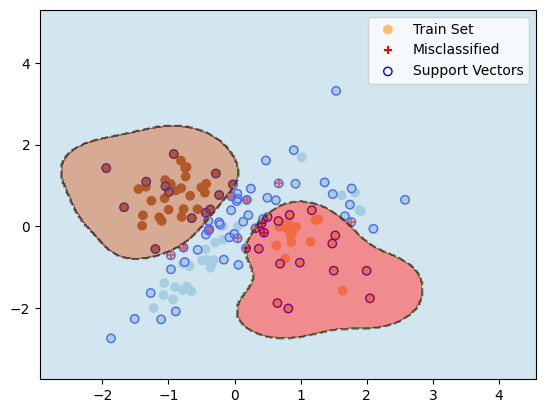

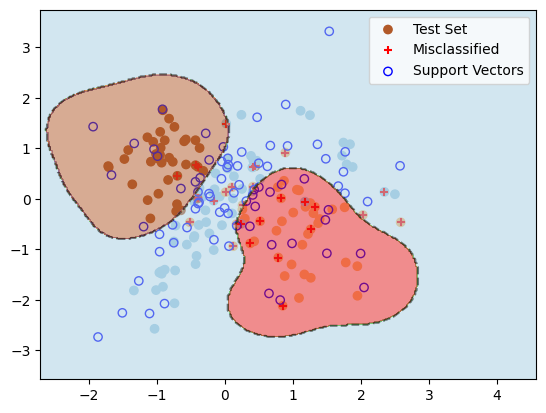

In [9]:
# Create a support vector classifier
# Plotting for the gamma that had the best results
svm_rbf = SVM__RBF_classifier(2, X_train, y_train.values.ravel(), X_test, y_test)
clf_rbf = svm_rbf[0]

# Predict on the test set
y_pred = svm_rbf[3]
y_pred_train = svm_rbf[4]
misclassified_indices = []

# Plot the SVM classifier
plot_svm(clf_rbf, X_train, y_train, y_pred_train, True )
plot_svm(clf_rbf, X_test, y_test, y_pred, False)